# playing around with 3-D plotting of fields and surfaces

In [1]:
##%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

import matplotlib.cm as cm
import matplotlib.mlab as mlab
import mpl_toolkits.mplot3d as plt3
from mpl_toolkits.mplot3d import axes3d

from matplotlib.ticker import LinearLocator, FormatStrFormatter


Following: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

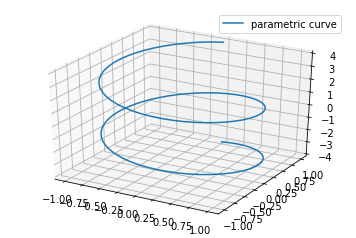

In [2]:
fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-2 * np.pi, 2 * np.pi, 100)
z = np.linspace(-4, 4, 100)
r = 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

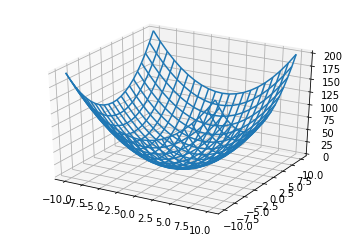

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(np.arange(-10, 11, 1), np.arange(-10, 11, 1))
Z = X**2 + Y**2

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)

plt.show()

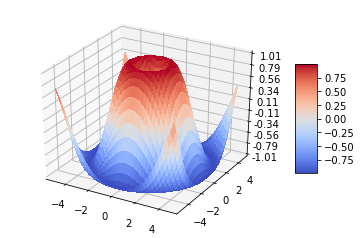

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

init got called


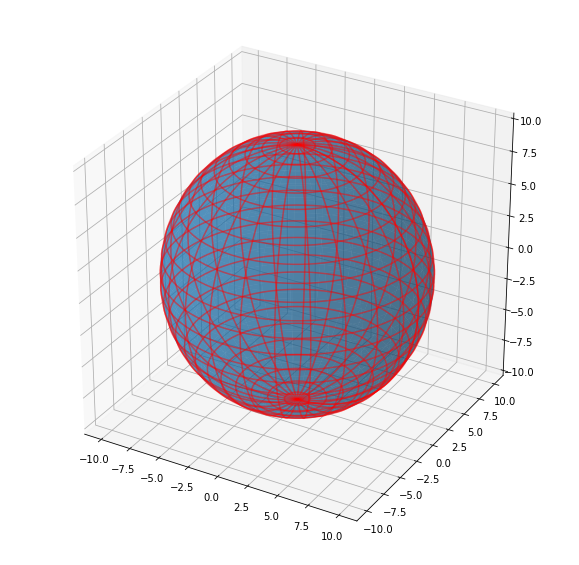

In [9]:
from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Make data
def makeData():
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = 10 * np.outer(np.cos(u), np.sin(v))
    y = 10 * np.outer(np.sin(u), np.sin(v))
    z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
    return x, y, z


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x, y, z = makeData()
ax.plot_surface(x, y, z, alpha=0.5, linewidth=1)
wframe = ax.plot_wireframe(x,y,z, color='red', rstride=4, cstride=4, alpha=0.5)

#x,y,z = [], [], []
#wframe=None

def init():
    print("init got called")
    x, y, z = makeData()
#    fig = plt.figure(figsize=(10, 10))
#    ax = fig.add_subplot(111, projection='3d')
#    ax.plot_surface(x, y, z, alpha=0.5, linewidth=1)
#    wframe = ax.plot_wireframe(x,y,z, color='red', rstride=4, cstride=4, alpha=0.5)
    return wframe,
    
def update(frame): 
    print("update got called ", frame)
    x, y, z = makeData()
    if wframe: ax.collections.remove(wframe)
    wframe = ax.plot_wireframe(x,y,z, color='black', rstride=4, cstride=4, alpha=0.5)
    return wframe,

#ani = FuncAnimation(fig, update, init_func=init, frames=360, interval=20)
ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 300),
                    init_func=init, blit=True)
#ani = FuncAnimation(fig, update, 30, interval=350,
#                    init_func=init, blit=True)

plt.show()


In [10]:
lam=28
prod=1.0
sum=prod
for i in range(1,48):
    prod *= lam/i
    sum += prod
#    print(i,", ", sum)
    
print("CL: ", np.exp(-lam)*sum)
print("Result: ", 1-np.exp(-lam)*sum)

sum2=0
for i in range(48,1000):
    prod *= lam/i
    sum2 += prod
print("Result2: ", sum2*np.exp(-lam))

sumg=0
s=np.sqrt(28)
n = np.sqrt(2*np.pi)*s
step=10
for i in range(-500, 48*step):
    x=i/step
    sumg += np.exp(-(x-28)**2/(2*s**2))/(n*step)

print("gauss ", sumg, ", " , 1.0-sumg)

CL:  0.999633371346
Result:  0.000366628654255
Result2:  0.000366628654255
gauss  0.999918458514 ,  8.15414864201e-05


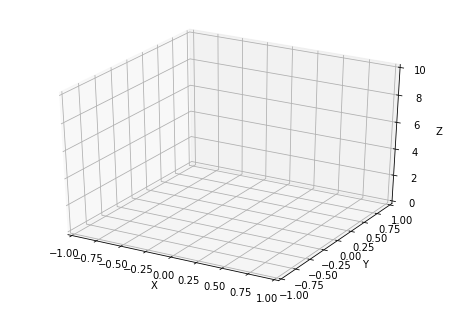

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

fig = plt.figure()
ax = p3.Axes3D(fig)

def gen(n):
    phi = 0
    while phi < 2*np.pi:
        yield np.array([np.cos(phi), np.sin(phi), phi])
        phi += 2*np.pi/n

def update(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

N = 100
data = np.array(list(gen(N))).T
line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1])

# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 10.0])
ax.set_zlabel('Z')

ani = animation.FuncAnimation(fig, update, N, fargs=(data, line), interval=10000/N, blit=False)
#ani.save('matplot003.gif', writer='imagemagick')
plt.show()